In [1]:
import pandas as pd
from dask import dataframe as dd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

con = sqlite3.connect('D:\DataScience\statewide.db')

In [ ]:
df = pd.read_sql_query("SELECT posted_speed, charged_speed, outcome FROM statewide WHERE posted_speed IS NOT NULL AND charged_speed IS NOT NULL AND posted_speed IS NOT 'NA' AND posted_speed IS NOT '0' AND charged_speed IS NOT '0' AND charged_speed IS NOT 'NA' AND outcome IS NOT NULL limit 1000", con, chunksize=1000)
df2 = pd.read_sql_query("SELECT CAST(subject_age AS INTEGER) as age, outcome FROM statewide WHERE subject_age IS NOT NULL AND outcome is not null and subject_age is not 'NA'", con)

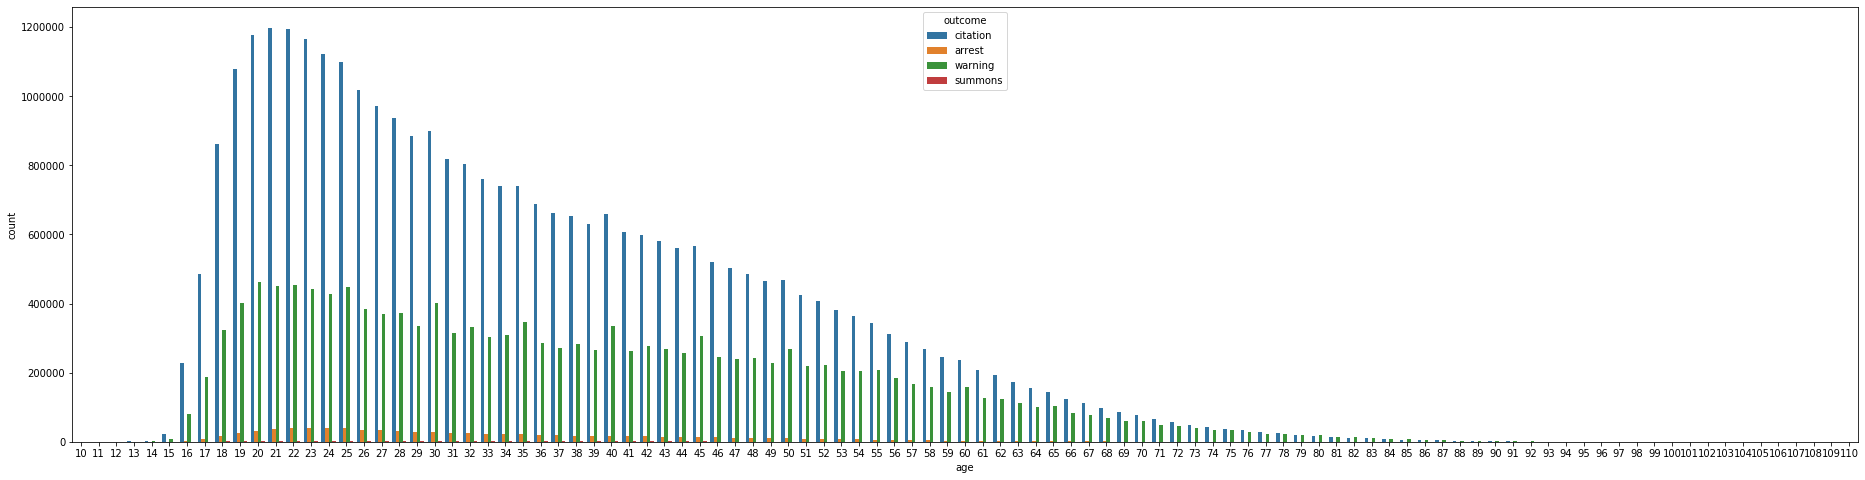

In [71]:
plt.figure(figsize=(32, 8));
orderByAge = df2['age'].unique()
orderByAge.sort()
sns.countplot(x="age", hue="outcome", data=df2, order=orderByAge)

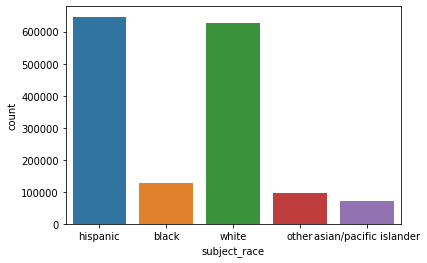

In [73]:
df3 = pd.read_sql_query("SELECT subject_race, outcome FROM statewide WHERE outcome IN ('arrest', 'citation') AND subject_race NOT IN ('NA') AND subject_race IS NOT NULL AND State='CA'", con)
sns.countplot(x="subject_race", data=df3)


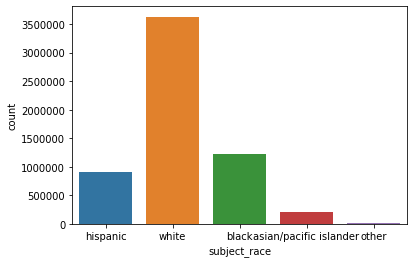

In [74]:
df4 = pd.read_sql_query("SELECT subject_race, outcome FROM statewide WHERE outcome IN ('arrest', 'citation') AND subject_race NOT IN ('NA') AND subject_race IS NOT NULL AND State='IL'", con)

sns.countplot(x="subject_race", data=df4)

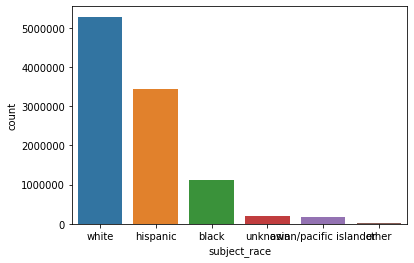

In [75]:
df5 = pd.read_sql_query("SELECT subject_race, outcome FROM statewide WHERE outcome IN ('arrest', 'citation') AND subject_race NOT IN ('NA') AND subject_race IS NOT NULL AND State='TX'", con)

sns.countplot(x="subject_race", data=df5)

In [2]:
df6 = pd.read_sql_query("SELECT subject_race, time, CASE arrest_made WHEN 'TRUE' THEN true WHEN 'FALSE' THEN false END FROM statewide WHERE arrest_made NOT IN ('NA') AND subject_race IN ('white', 'black') AND subject_race IS NOT NULL AND time IS NOT NULL AND time NOT IN ('NA')", con)

In [3]:
white = df6[df6.subject_race == 'white']
black = df6[df6.subject_race == 'black']

In [4]:
white.rename(columns={"CASE arrest_made WHEN 'TRUE' THEN true WHEN 'FALSE' THEN false END": "arrest_made"}, inplace=True)
black.rename(columns={"CASE arrest_made WHEN 'TRUE' THEN true WHEN 'FALSE' THEN false END": "arrest_made"}, inplace=True)
print(white.dtypes)
print(black.dtypes)
#print(white.arrest_made.mean())
#print(black.arrest_made.mean())
white['stop_datetime'] = pd.to_datetime(white.time)
black['stop_datetime'] = pd.to_datetime(black.time)
# white_arrest_rate = white.groupby(white.index.hour).arrest_made.mean()
# black_arrest_rate = black.groupby(black.index.hour).arrest_made.mean()
# fig, ax = plt.subplots(figsize=(17,6))
# sns.lineplot(data= white_arrest_rate,
#             color='r',
#             ax=ax)
# sns.lineplot(data= black_arrest_rate, 
#             color='b',
#             ax=ax)

D:\Programme\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


subject_race    object
time            object
arrest_made      int64
dtype: object
subject_race    object
time            object
arrest_made      int64
dtype: object


D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# white_arrest_rate = white.groupby(white.stop_datetime.hour).arrest_made.mean()
# black_arrest_rate = black.groupby(black.index.hour).arrest_made.mean()
white.set_index('stop_datetime', inplace=True)

In [16]:
black.set_index('stop_datetime', inplace=True)

In [13]:
white_arrest_rate = white.groupby(white.index.hour).arrest_made.mean()

In [17]:
black_arrest_rate = black.groupby(black.index.hour).arrest_made.mean()

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

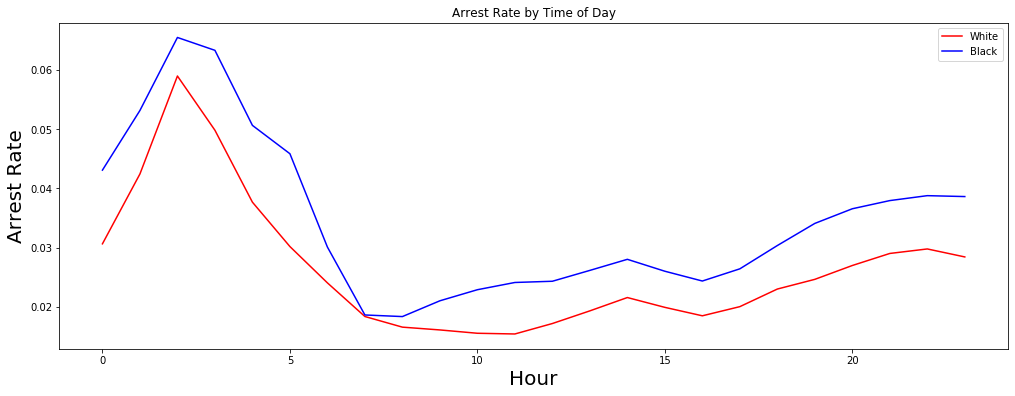

In [22]:
fig, ax = plt.subplots(figsize=(17,6))
sns.lineplot(data=white_arrest_rate,
             color='r',
             ax=ax)
sns.lineplot(data=black_arrest_rate, 
             color='b',
             ax=ax) 
ax.legend(['White', 'Black'], facecolor='w')
plt.xlabel('Hour', size=20)
plt.ylabel('Arrest Rate', size=20)
plt.title('Arrest Rate by Time of Day')